<a href="https://colab.research.google.com/github/madhav48/YLOLORecognition/blob/main/YOLORecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Setup.. Download all the required libraries and dependencies </h1>

In [1]:
# !pip install roboflow  # For custom dataset..

In [1]:
# Install the required files..

!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 16522, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 16522 (delta 50), reused 52 (delta 16), pack-reused 16402
Receiving objects: 100% (16522/16522), 15.18 MiB | 15.98 MiB/s, done.
Resolving deltas: 100% (11310/11310), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.9/638.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.7/744.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.9/264.9 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 

In [2]:
# Check for the successfull setup..

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


<h1> Detect on Old Data </h1>

In [4]:
# Run YOLO Model to detect objects..

# Run detect.py file..
# Here weights are pretrained weights..  -> yolo5s.pt
# img size is taken as 640..
# source is the path to folder whcih contian images..

# Saves resulting images at runs/detect/exp{i} with an increament to i..

!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CPU

100% 14.1M/14.1M [00:00<00:00, 57.7MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 621.9ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 493.2ms
Speed: 4.1ms pre-process, 557.5ms inference, 24.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


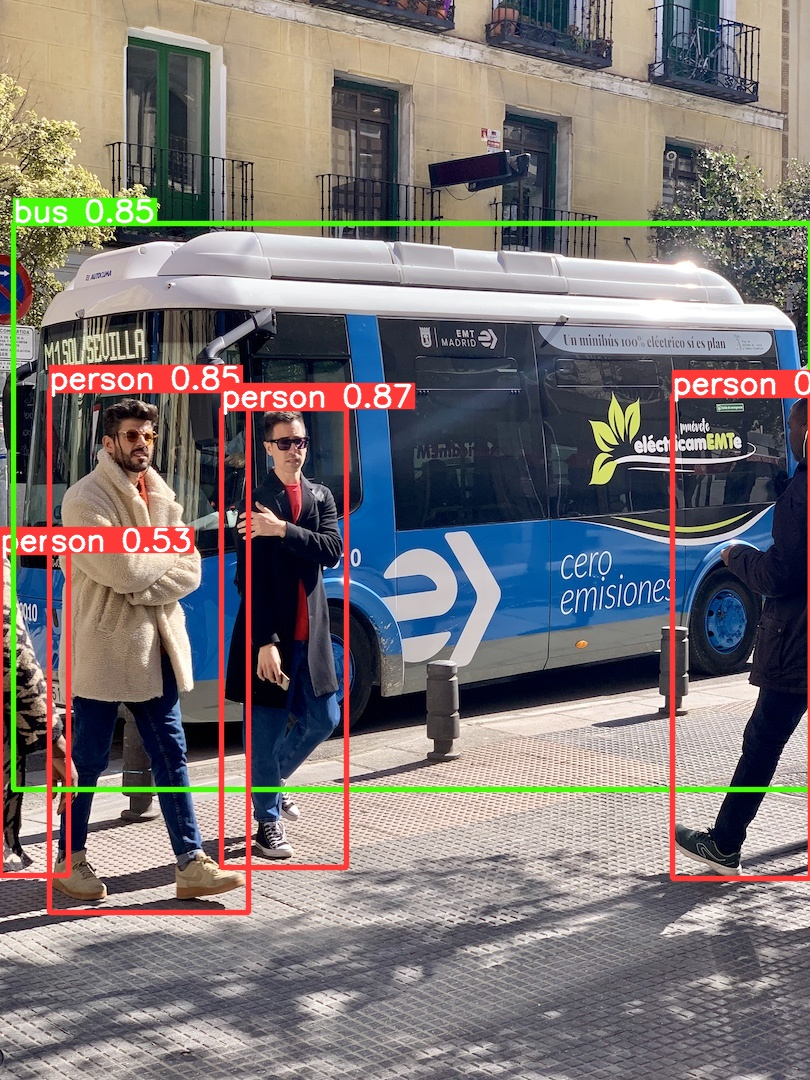

In [5]:
# Display the resulting image using the utils provided by YOLO..
display.Image(filename='runs/detect/exp/bus.jpg', width=600)

<h1> Training on custom Dataset </h1>

In [3]:
# @title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'ClearML', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


  - Custom dataset made from roboflow (https://roboflow.com)
    - 3 class - 3 images each..

In [7]:
# Get the custom-dataset for trianing from roboflow..
# Import roboflow, download zip file from the project then extract it finally..

# from roboflow import Roboflow
# rf = Roboflow(api_key="obeLMhlUn9d2c3gEsrT3")
# project = rf.workspace("madhavws").project("carbiketruckrecogniser")
# version = project.version(1)
# dataset = version.download("yolov5")

In [ ]:
# Download and extract dataset..
%cd /content/
!curl -L "https://app.roboflow.com/ds/9xcOUUqFzb?key=D8RS9Trwud" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
%cd yolov5

In [ ]:
# Finally train on the custom dataset..
!python train.py --img 640 --batch 2 --epochs 2 --data /content/data.yaml --weights 'yolov5s.pt' --cache

<h1>Checking on Testcases.. </h1>

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.025 --source data/images

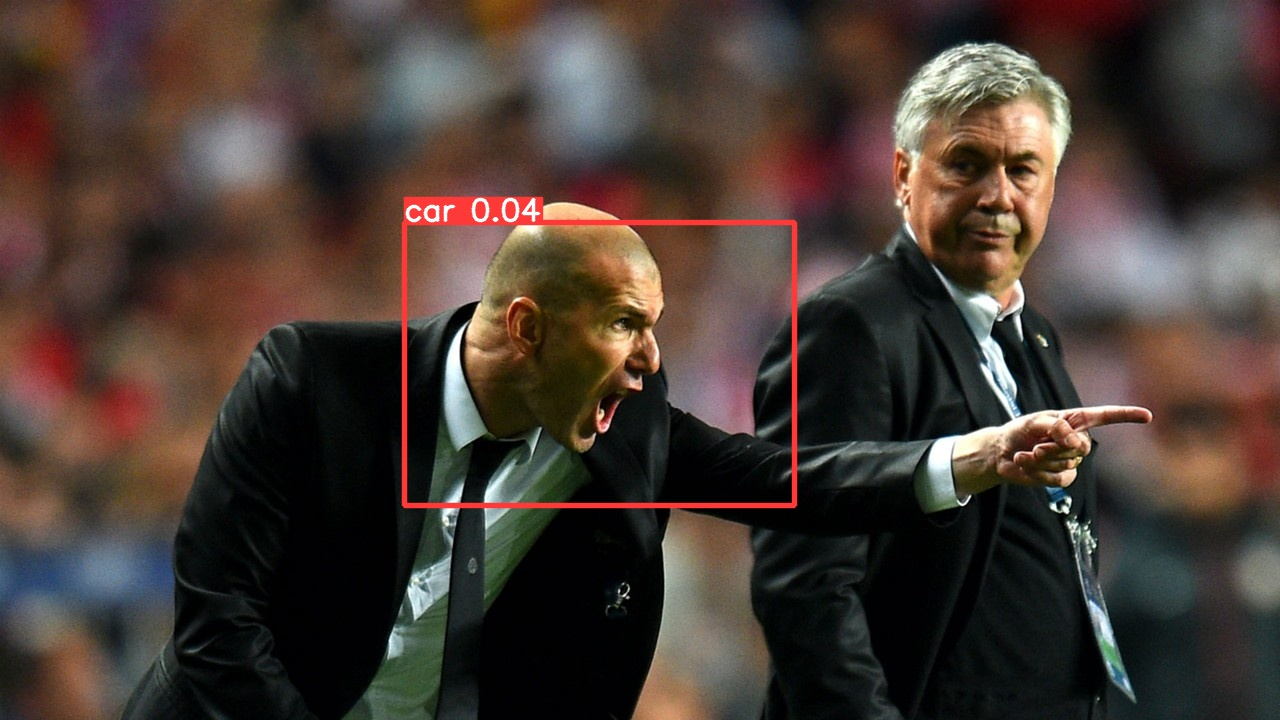

In [50]:
display.Image(filename='runs/detect/exp2/zidane.jpg', width=600)

<h1> Visualize </h1>

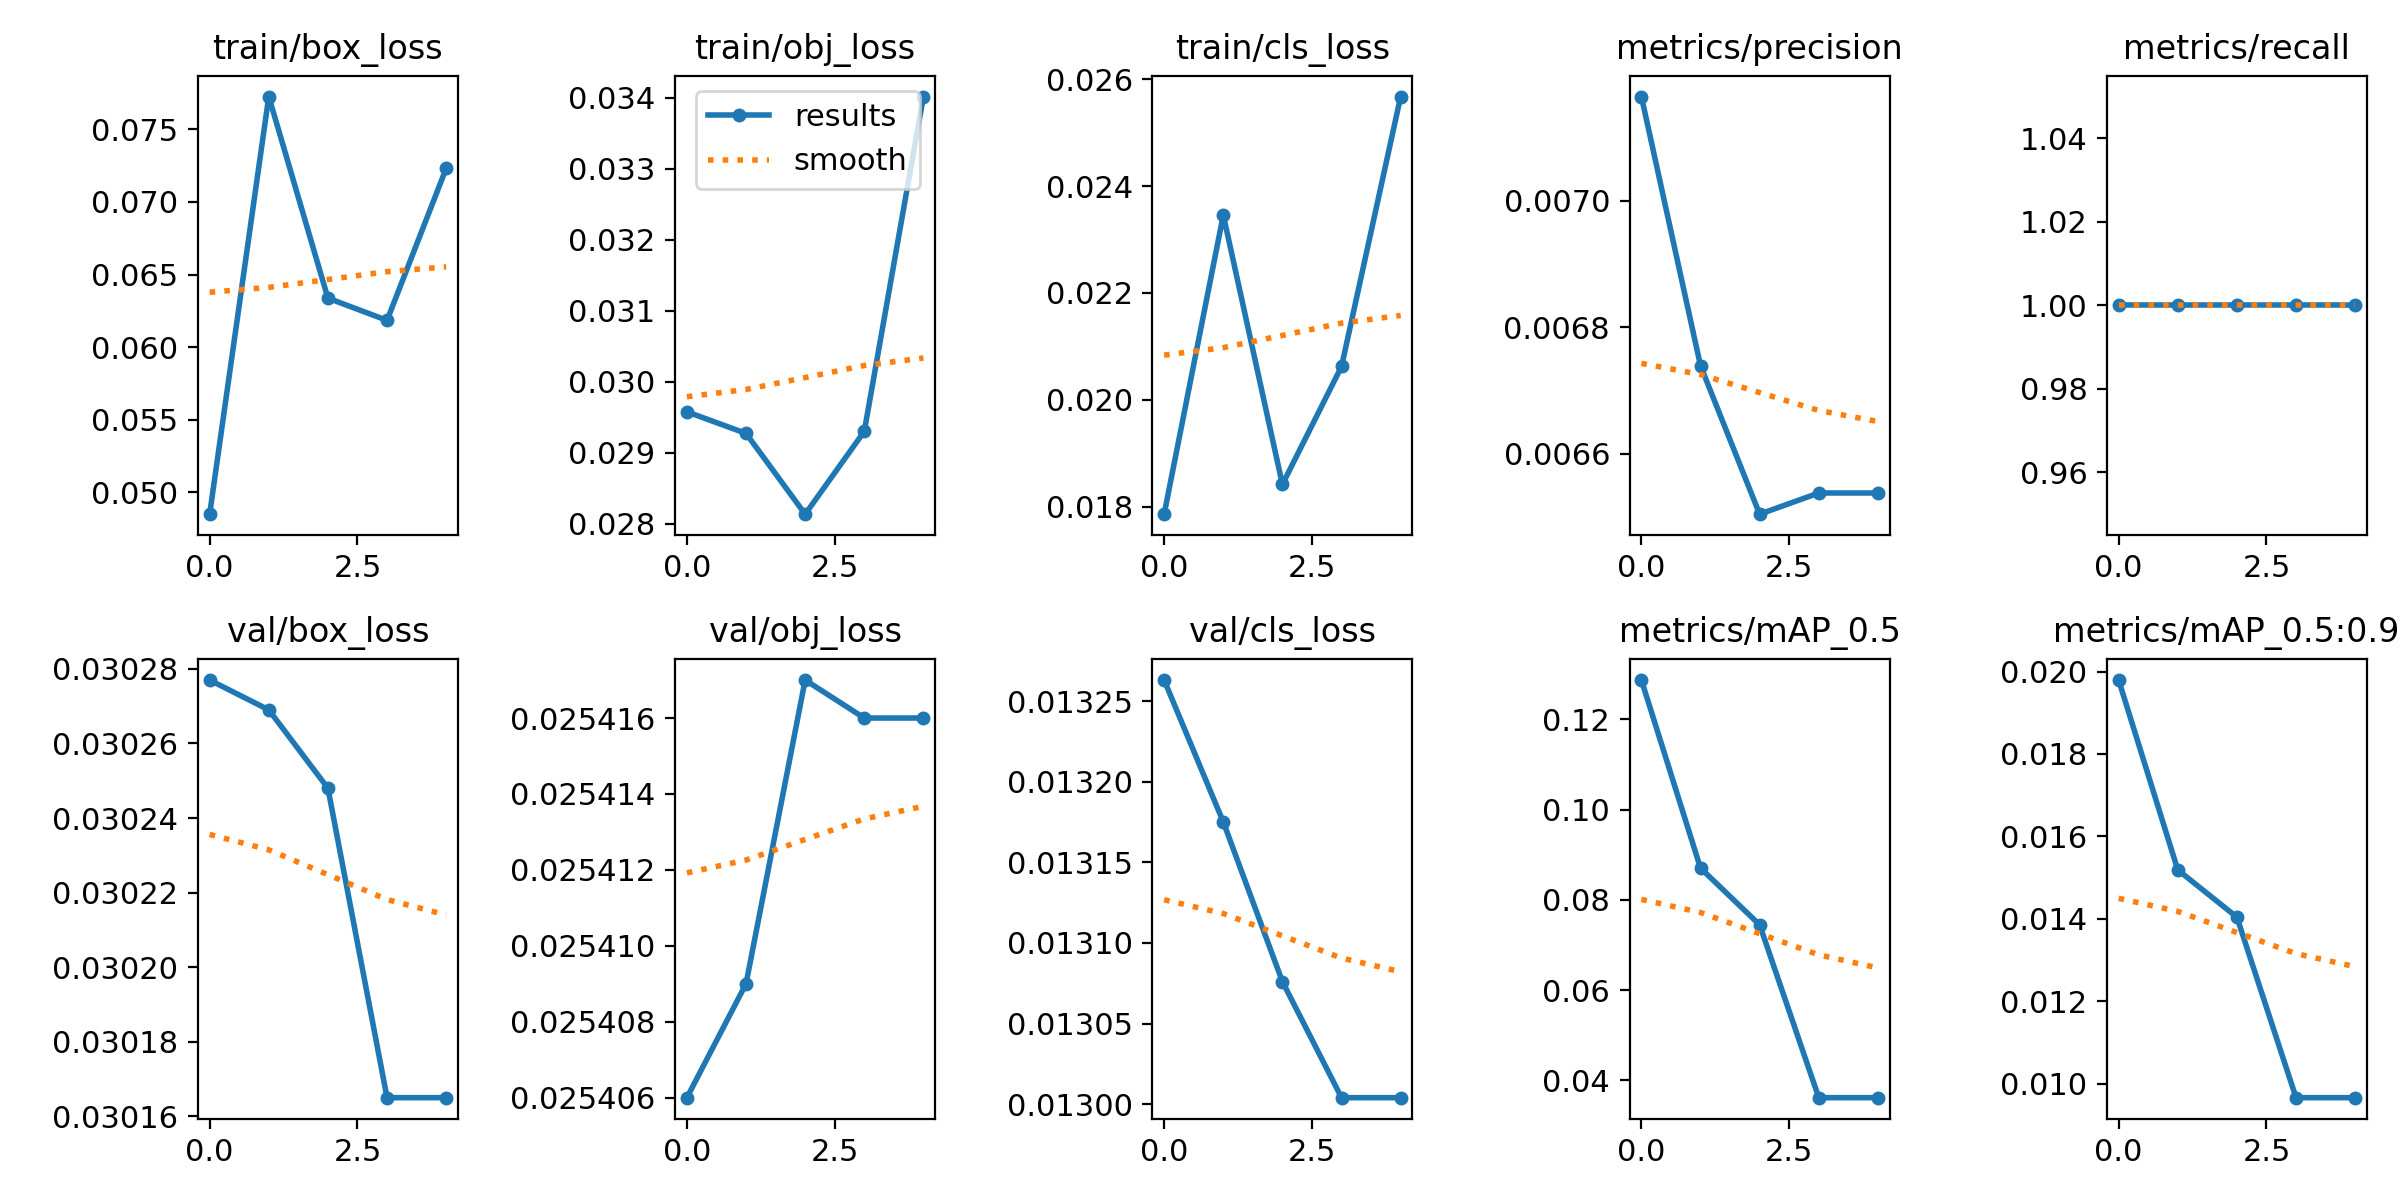

In [61]:
# Analyse the model over the training data ..
display.Image(filename='runs/train/exp/results.png', width=600)

<h1> Training on another dataset</h1>

  - Datset conatins 2 classes - robot and note and about 33500 images..
  - FRC 2024

In [ ]:
# Download and extract the dataset..
%cd /content/
!curl -L "https://universe.roboflow.com/ds/KZVKQMUIJu?key=BHflWc1hqr" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
%cd yolov5

In [ ]:
# Finally train on the downlaoded dataset..
# Keep batch size samll to avoid memory eroor..
!python train.py --img 640 --batch 64 --epochs 3 --data /content/data.yaml --weights 'yolov5s.pt' --device 0

View the results..

In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.3 --source data/images

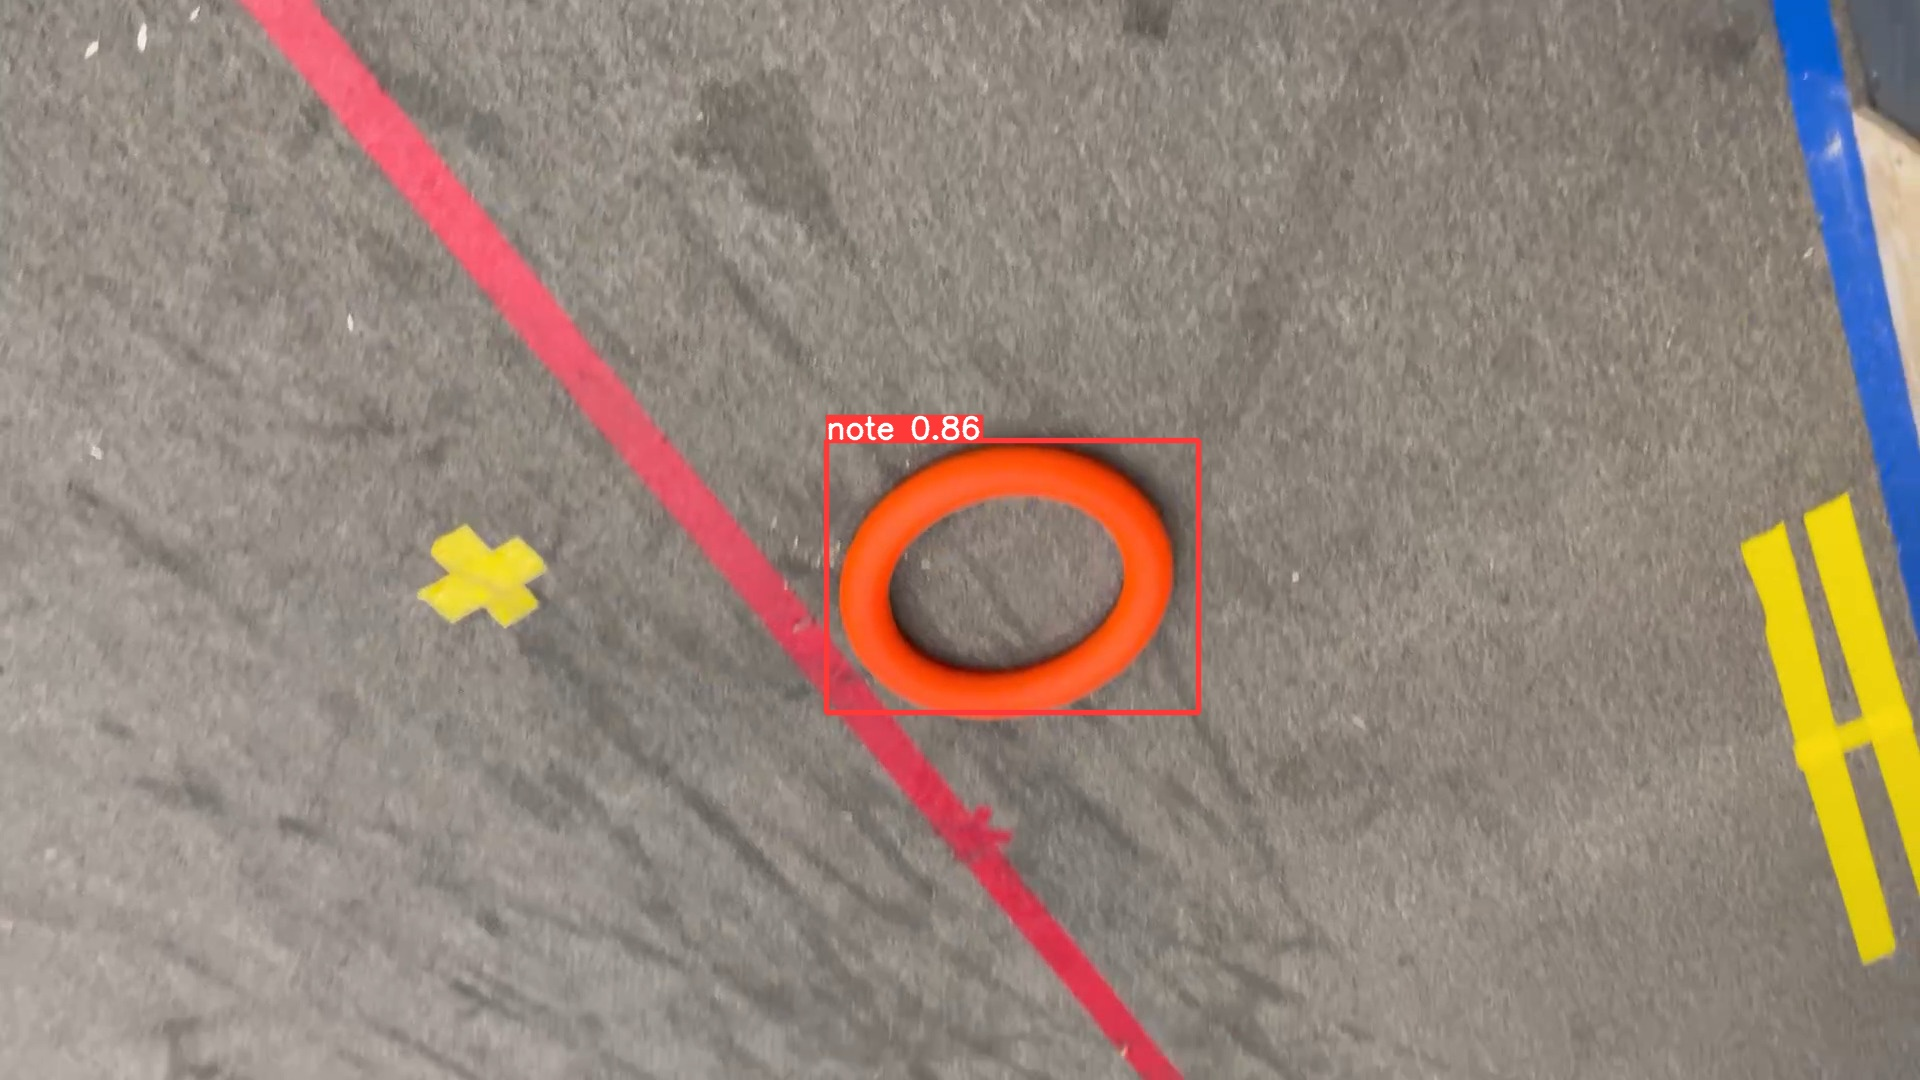

In [34]:
display.Image(filename='runs/detect/exp3/test1.jpg', width=600)

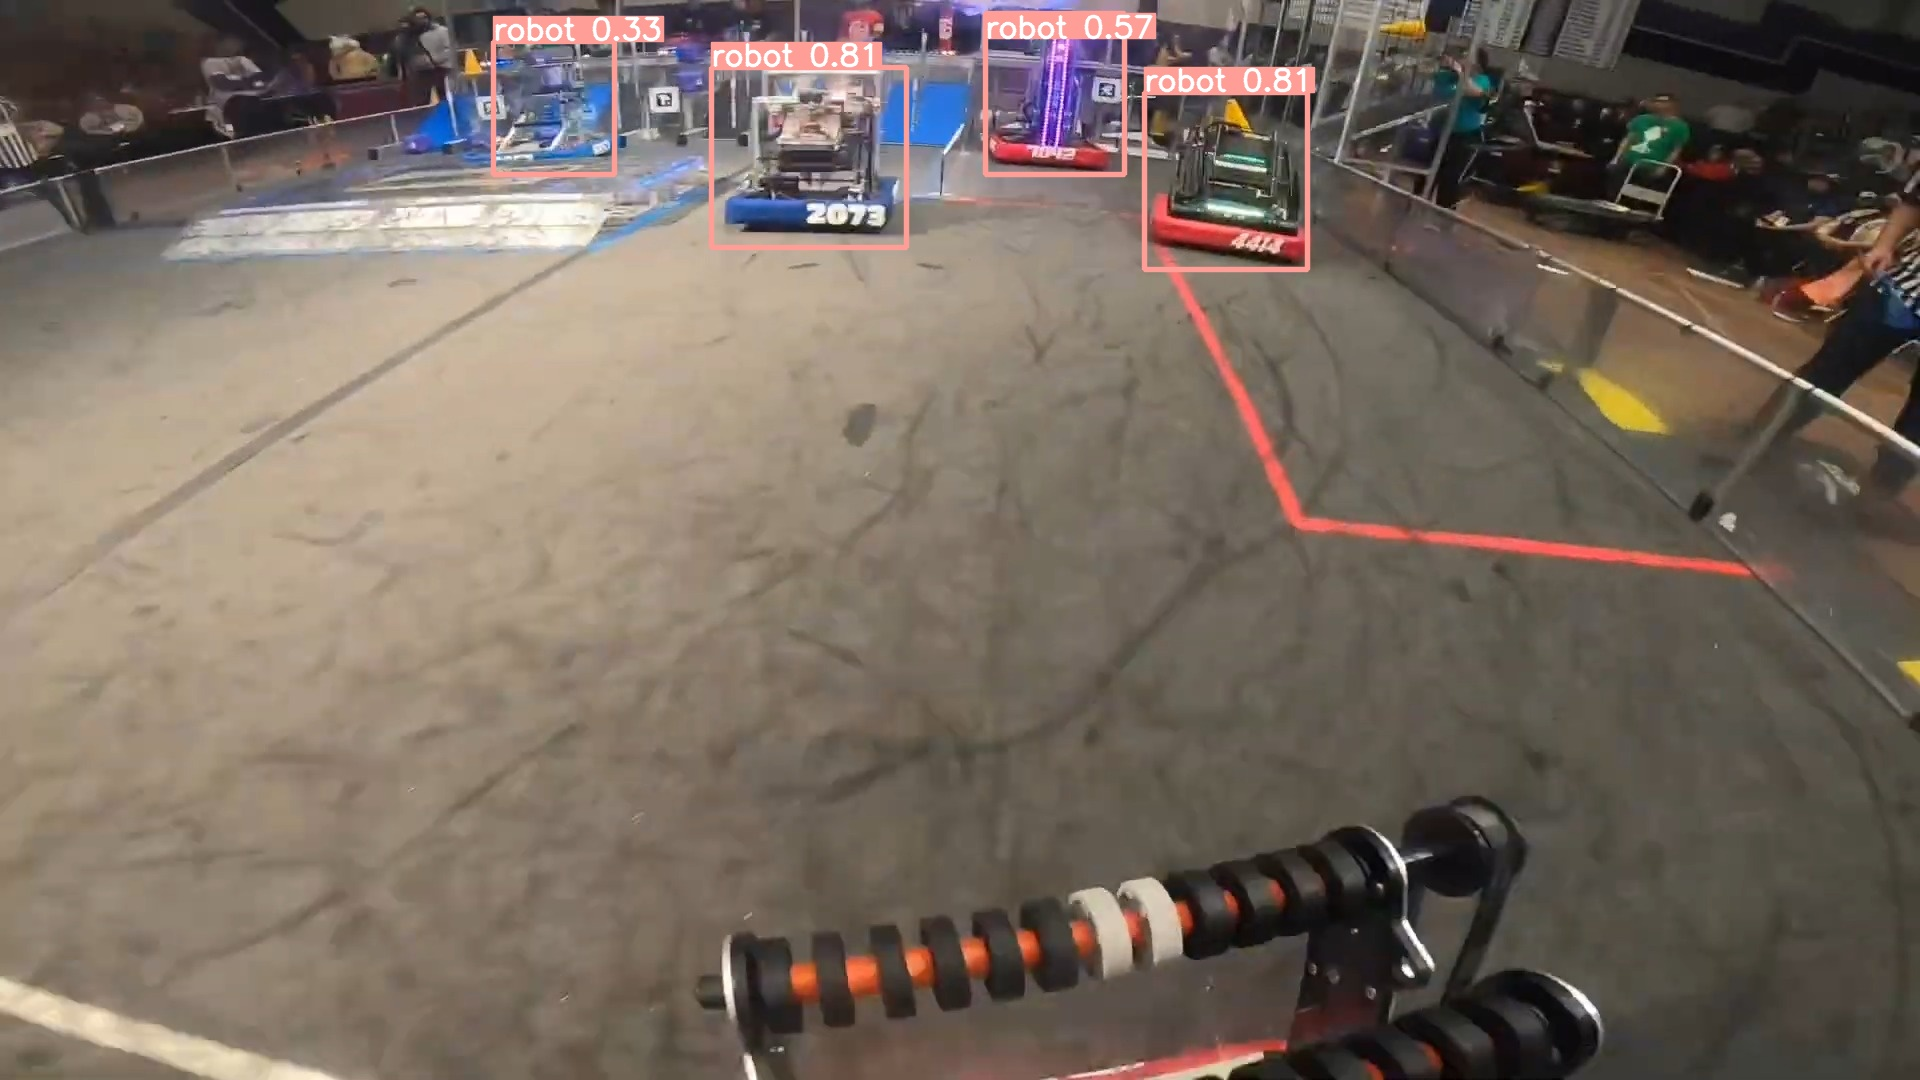

In [32]:
display.Image(filename='runs/detect/exp3/test2.jpg', width=600)

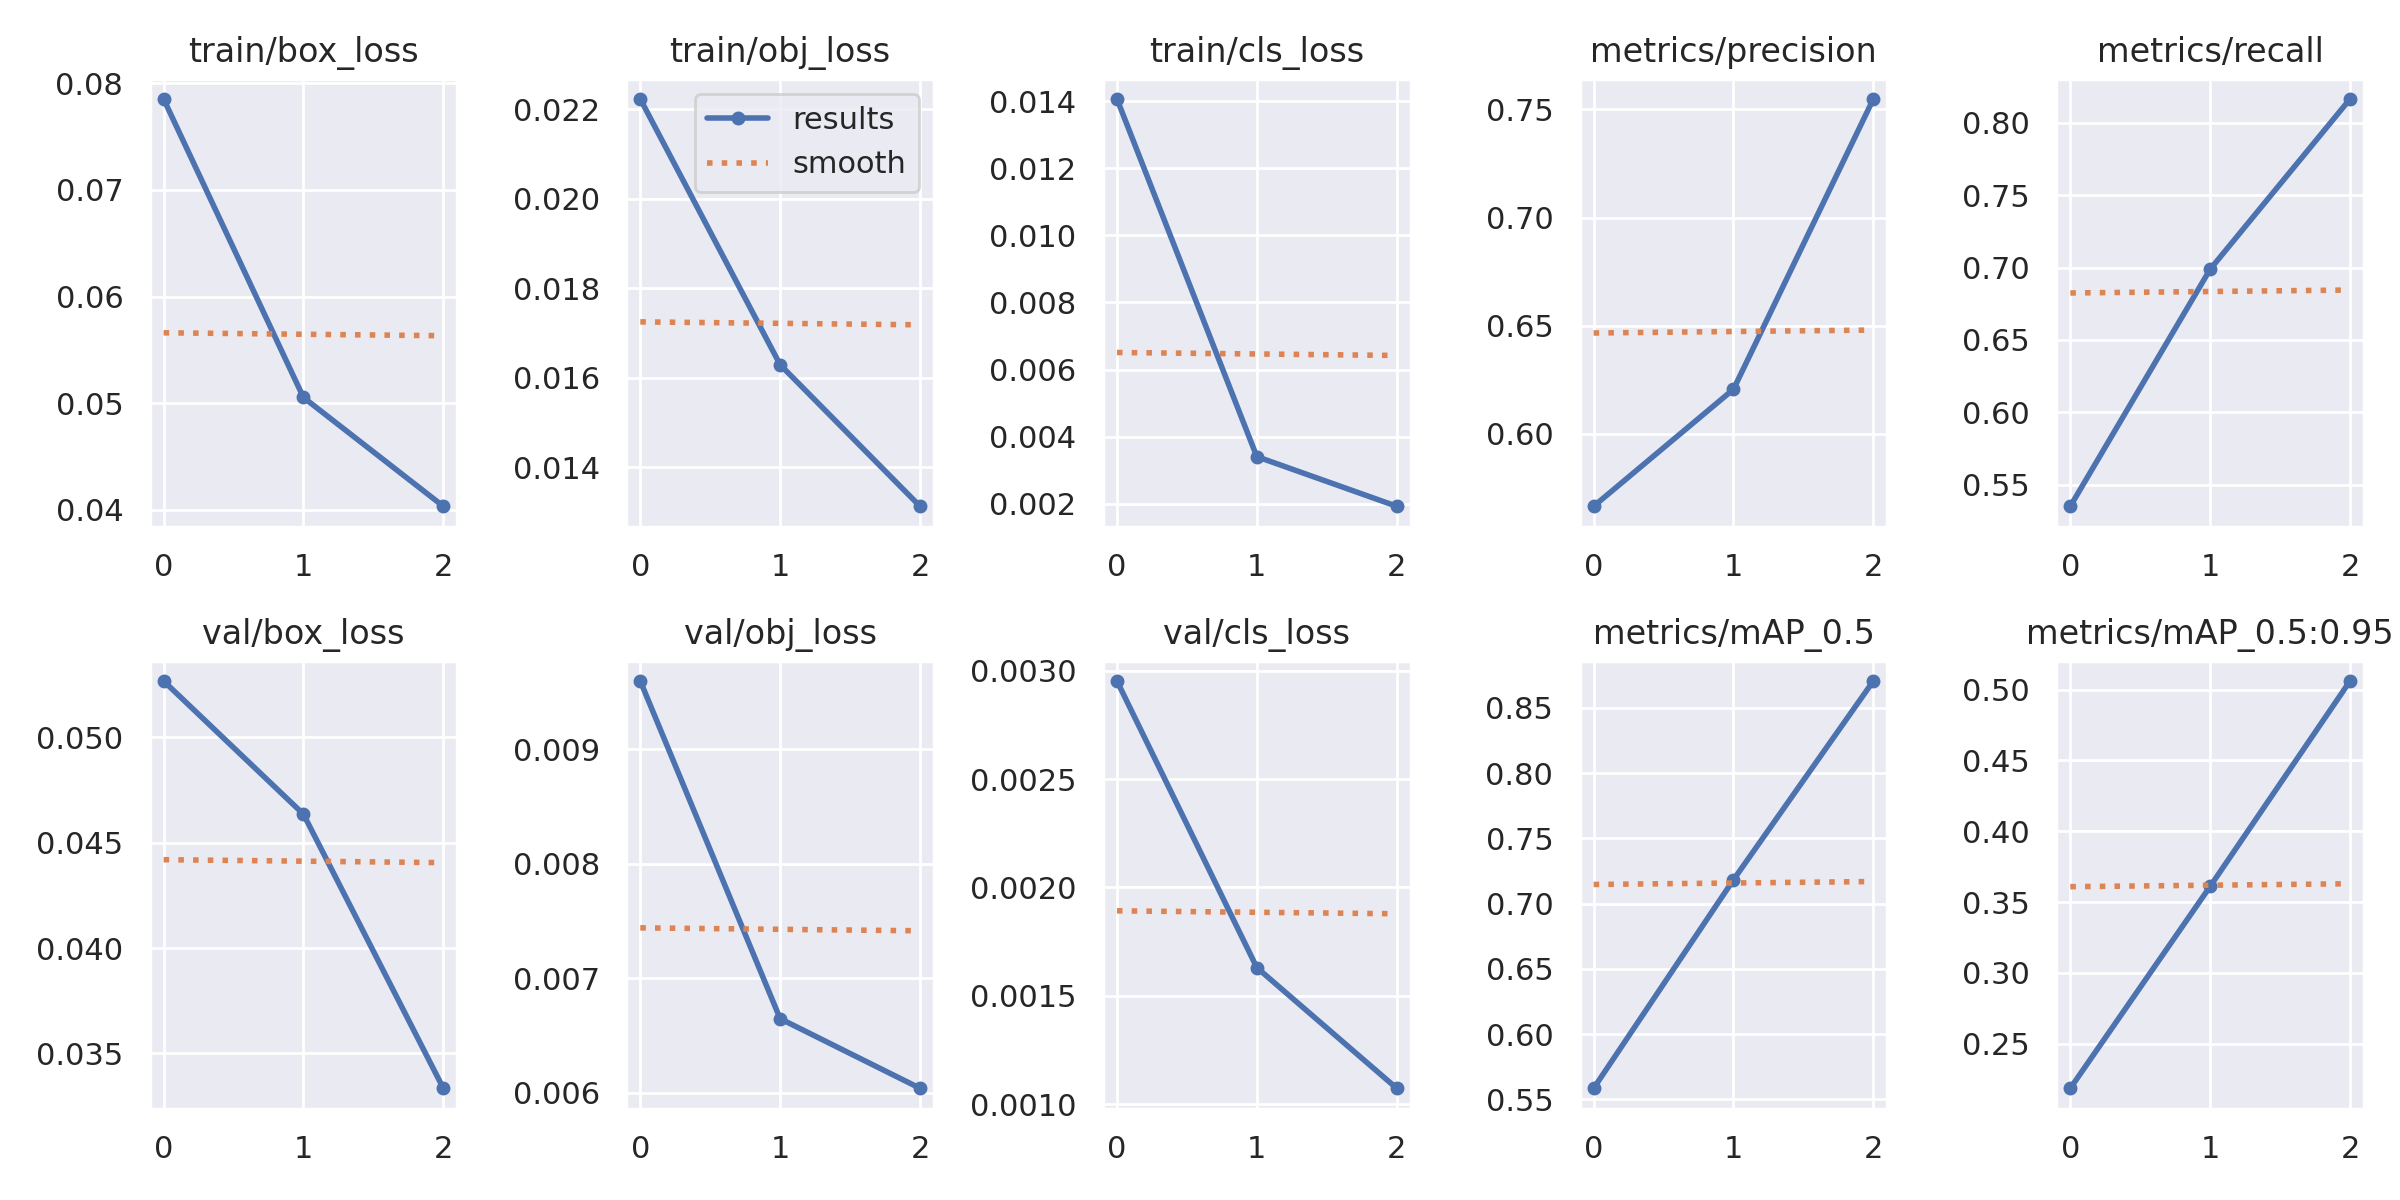

In [27]:
# Analyse the model over the training data ..
display.Image(filename='runs/train/exp3/results.png', width=600)